In [48]:
from scipy.stats import norm
import numpy as np

def select_action(Q_values, changed_rewards, N_actions, epsilon, constant_step_size, alpha):
    if (1 - epsilon) >= np.random.random():  # Exploit
        action = max(Q_values, key=Q_values.get)
    else:  # Explore
        action = np.random.choice(list(N_actions.keys()))

    if constant_step_size is False:
        Q_values[action] += (1 / N_actions[action]) * (changed_rewards[action] - Q_values[action])
    else:
        Q_values[action] += alpha * (changed_rewards[action] - Q_values[action])

    N_actions[action] += 1
    return Q_values, N_actions, action


def nonstationary_problem(action_range, true_q_values, total_time_steps, epsilon, constant_step_size=False, alpha=0.1):
    cumulative_rewards_sum = 0
    avg_rewards_per_step = []
    for time_step in range(1, total_time_steps + 1):
        q_variations = {action: norm.rvs(loc=0, scale=4) for action in action_range}
        changed_rewards = {action: true_q_values[action] + q_variations[action] for action in action_range}

        if time_step == 1:
            Q_values = {action: np.random.uniform(-1, 1) for action in action_range}
            N_actions = {action: 1 for action in action_range}

        Q_values, N_actions, action = select_action(Q_values, changed_rewards, N_actions, epsilon, constant_step_size, alpha)
        cumulative_rewards_sum += changed_rewards[action]
        avg_rewards_per_step.append(cumulative_rewards_sum / time_step)

    return avg_rewards_per_step

In [73]:
action_range = range(1, 10+1) # action: 1~10
true_reward_values = {action: np.random.randint(low = -5, high = 5) for action in action_range}
epsilon = 0.1
total_time_steps = 5000

In [80]:
np.random.seed(100)
# Non-constant time step
non_const_avg = nonstationary_problem(action_range, true_reward_values, total_time_steps, epsilon, constant_step_size = False)
const_avg = nonstationary_problem(action_range, true_reward_values, total_time_steps, epsilon, constant_step_size = True, alpha = 0.1)

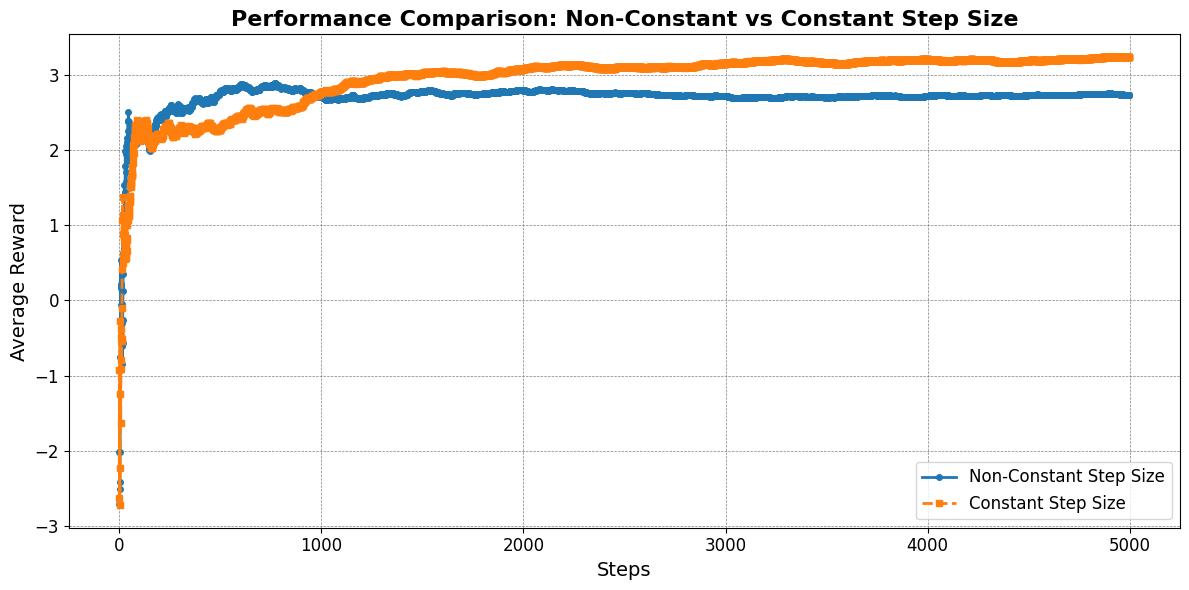

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(non_const_avg, label='Non-Constant Step Size', linewidth=2, linestyle='-', marker='o', markersize=4)
plt.plot(const_avg, label='Constant Step Size', linewidth=2, linestyle='--', marker='s', markersize=4)

plt.title('Performance Comparison: Non-Constant vs Constant Step Size', fontsize=16, fontweight='bold')
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Average Reward', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, loc='best')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


------

## **Conclusion**
In non-stationary environments, **constant step size** demonstrates superior adaptability to changing reward distributions due to its fixed learning rate, allowing it to quickly incorporate new information. On the other hand, **non-constant step size**, with its diminishing update rate, struggles to adjust to rapid changes, making it better suited for stationary environments. This highlights the importance of selecting an appropriate step size strategy based on the problem's characteristics.